<a href="https://colab.research.google.com/github/arakshay60/bird-species-classification/blob/main/Classification_of_bird_species_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.6.0'

In [3]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 1581070794800..jpg   1581076018155..jpg
 1581071034814..jpg   1581076027330..jpg
 1581071097095..jpg   1581076049774..jpg
 1581071109804..jpg   20200925_190537_1.mp4
 1581071260694..jpg   20200925_190537.mp4
 1581071335717..jpg  'Adarsh Management.mp4'
 1581071353726..jpg  'Akshay A R Resume (1).pdf'
 1581071365928..jpg  'Akshay A R Resume.pdf'
 1581072029864..jpg  'Bird Speciees Dataset'
 1581072566217..jpg   Classroom
 1581072899561..jpg  'Colab Notebooks'
 1581072914395..jpg  'Getting started.pdf'
 1581074906078..jpg  'Highway Exit Drift 30052018192622.jpg'
 1581075673953..jpg   IMG-20180709-WA0001.jpg
 1581075699050..jpg   IMG-20200207-WA0026-01.jpeg
 1581075734014..jpg   IMG-20200207-WA0029-01.jpeg
 1581075758198..jpg   IMG-20200207-WA0031-01.jpeg
 1581075800193..jpg  'Management Seminarr.mp4'
 1581075823814..jpg   Rohit.mp4
 1581075834068..jpg  'rxy-oa

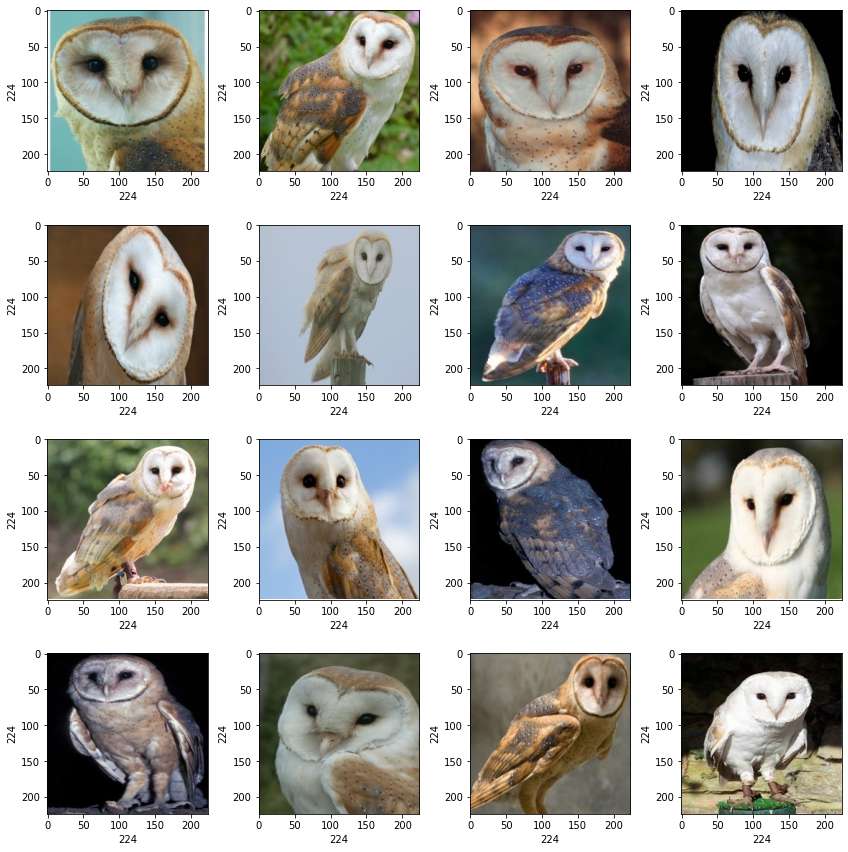

In [4]:
#visualizing random 16 images
from matplotlib.image import imread
import random
from os import listdir
plt.figure(figsize=(12,12))
path="/content/drive/My Drive/Bird Speciees Dataset/BARN OWL"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  randimg=imread(path +'/'+random.choice(sorted(listdir(path))))
  plt.imshow(randimg)
  plt.xlabel(randimg.shape[1],fontsize=10)
  plt.ylabel(randimg.shape[0],fontsize=10)

In [5]:
#converting images to numpy arrays
import cv2
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array,array_to_img
dir="/content/drive/My Drive/Bird Speciees Dataset"
root_dir=listdir(dir)
image_list,species_list=[],[]
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path=f"{dir}/{directory}/{files}"
    image=cv2.imread(image_path)
    image=img_to_array(image)
    image_list.append(image)
    species_list.append(directory)

In [6]:
species_counts=pd.DataFrame(species_list).value_counts()
species_counts

AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
dtype: int64

In [7]:
no_of_classes=len(species_counts)
no_of_classes

6

In [8]:
image_list[0].shape

(224, 224, 3)

In [9]:
species_list=np.array(species_list)
species_list.shape


(811,)

In [10]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(image_list,species_list,test_size=0.2,random_state=10)


In [11]:
#applying feature scaling to the data
x_train=np.array(x_train,dtype=np.float16)/225.0
x_test=np.array(x_test,dtype=np.float16)/225.0
x_train.reshape(-1,224,224,3)
x_test.reshape(-1,224,224,3)

array([[[[0.9556  , 0.951   , 0.933   ],
         [0.96    , 0.9556  , 0.938   ],
         [0.9556  , 0.951   , 0.933   ],
         ...,
         [0.96    , 0.9644  , 0.947   ],
         [0.9688  , 0.9644  , 0.947   ],
         [0.9644  , 0.96    , 0.9424  ]],

        [[0.96    , 0.9556  , 0.938   ],
         [0.96    , 0.9556  , 0.938   ],
         [0.9556  , 0.951   , 0.933   ],
         ...,
         [0.9688  , 0.973   , 0.9556  ],
         [0.9824  , 0.9775  , 0.96    ],
         [0.9775  , 0.973   , 0.9556  ]],

        [[0.9644  , 0.96    , 0.9424  ],
         [0.9644  , 0.96    , 0.9424  ],
         [0.96    , 0.9556  , 0.938   ],
         ...,
         [0.9775  , 0.973   , 0.9556  ],
         [0.9775  , 0.973   , 0.9556  ],
         [0.973   , 0.9688  , 0.951   ]],

        ...,

        [[0.8623  , 0.8623  , 0.8354  ],
         [0.8936  , 0.8936  , 0.8667  ],
         [0.9023  , 0.9023  , 0.8755  ],
         ...,
         [0.88    , 0.8667  , 0.849   ],
         [0.8843  , 0.

In [12]:
#converting categorical variables 
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train=lb.fit_transform(y_train)
y_test=lb.fit_transform(y_test)
print(lb.classes_)

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']


In [13]:
#splitting into validation and training sets
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2)

In [14]:
#cnn architecture
cnn=tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(8,kernel_size=3,padding='same',input_shape=(224,224,3),activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(3,3)))
cnn.add(tf.keras.layers.Conv2D(16,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
cnn.add(tf.keras.layers.Conv2D(32,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=32,activation='relu'))
cnn.add(tf.keras.layers.Dense(no_of_classes,activation='softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 74, 74, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10368)             0

In [15]:
#compiling cnn
cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
#training the model
history=cnn.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_val,y_val))

Epoch 1/50
5/5 [==============================] - 13s 2s/step - loss: 1.7846 - accuracy: 0.1622 - val_loss: 1.7455 - val_accuracy: 0.1615
Epoch 2/50
5/5 [==============================] - 12s 2s/step - loss: 1.7059 - accuracy: 0.1776 - val_loss: 1.6267 - val_accuracy: 0.2846
Epoch 3/50
5/5 [==============================] - 12s 2s/step - loss: 1.5284 - accuracy: 0.4730 - val_loss: 1.4357 - val_accuracy: 0.5385
Epoch 4/50
5/5 [==============================] - 12s 2s/step - loss: 1.2948 - accuracy: 0.5637 - val_loss: 1.1718 - val_accuracy: 0.6462
Epoch 5/50
5/5 [==============================] - 12s 2s/step - loss: 1.0217 - accuracy: 0.7124 - val_loss: 1.2533 - val_accuracy: 0.4923
Epoch 6/50
5/5 [==============================] - 12s 2s/step - loss: 0.9097 - accuracy: 0.6853 - val_loss: 1.1713 - val_accuracy: 0.5692
Epoch 7/50
5/5 [==============================] - 12s 2s/step - loss: 0.7902 - accuracy: 0.7548 - val_loss: 1.1777 - val_accuracy: 0.5538
Epoch 8/50
5/5 [==================

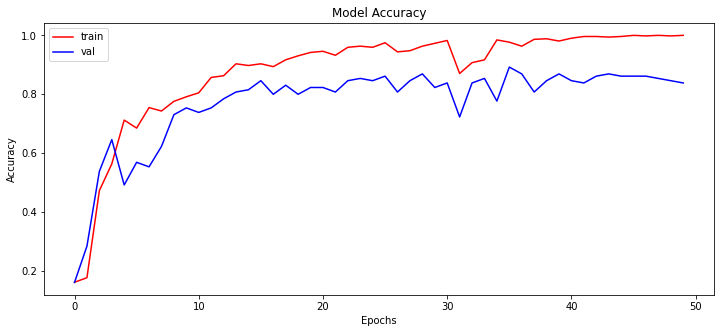

In [17]:
#plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

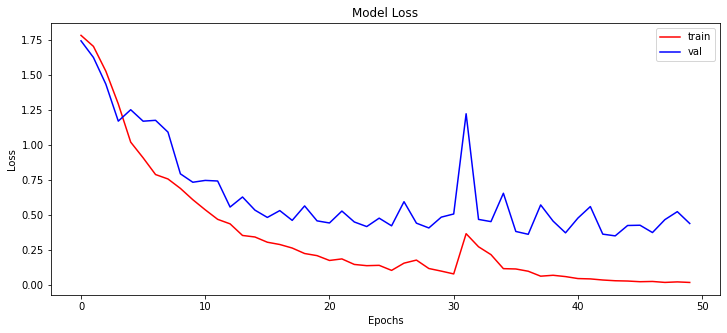

In [18]:
#plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [19]:
#test accuracy
scores = cnn.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

6/6 [==============================] - 1s 222ms/step - loss: 0.3917 - accuracy: 0.8834
Test Accuracy: 88.3435606956482


In [20]:
y_pred = cnn.predict(x_test)

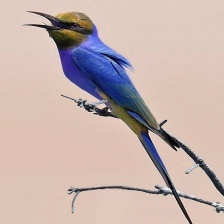

In [23]:
img = array_to_img(x_test[6])
img

In [24]:
#checking the predicted classes
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[6])])
print("Predicted : ",labels[np.argmax(y_pred[6])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']
Originally :  CARMINE BEE-EATER
Predicted :  CARMINE BEE-EATER
